In [31]:
import pandas as pd
import numpy as np
import random
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import pickle
from matplotlib.colors import LinearSegmentedColormap

# plt.style.use('bmh')

# from ipywidgets import widgets
# from IPython.display import display

%matplotlib inline  

ATL is located on the property of Georgia Power Co. at 829 Jefferson Street NW in Fulton County, GA. The site is  4.2 km northwest of downtown Atlanta, defined as the intersection of highways I-20 and I-75/85. ATL is in an area of mixed industrial-residential land use. Immediately surrounding the site are 1- and 2-story buildings, generally devoted to warehousing and storage, parking lots, and city streets. A resource recovery facility and a bus maintenance facility are located 700 m east and 250 m south, respectively. Located farther from the site (500–1000 m) are residential neighborhoods of single-family dwellings. The site is perched on a small grass-covered knoll  40 m east of Ashby Street and  30 m west of a large parking lot/storage area. Vegetation around the site includes 3- to 5-yr-old loblolly pines (3– 4 m tall), sparse deciduous trees (mainly oak) along Jefferson and Ashby Streets, and woody shrubs (mainly sumac) to the north.

In [2]:
# winter = datetime.date(2012, 12, 15)
# spring = datetime.date(2012, 3, 15)
# summer = datetime.date(2012, 6, 15)
# fall = datetime.date(2012, 9, 15)

summer = [6, 7, 8]
winter = [12, 1, 2]
spring = [3, 4, 5]
fall = [9, 10, 11]

season_map = {12: 4, 1: 4, 2: 4, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3}
day_night_map = {6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 0:2, 1:2, 2:2, 3:2, 4:2, 5:2, 18:2, 19:2, 20:2, 21:2, 22:2, 23:2}
weekday_map = {1:1, 2:1, 3:1, 4:1, 5:1, 6:2, 7:2}

season_p = {1:92/366, 2:92/366, 3:91/366, 4:91/366}
day_night_p = {1:1/2, 2:1/2}
weekday_p = {1:5/7, 2:2/7}

weekday = [0, 1, 2, 3, 4]
weekend = [5, 6]

day = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
night = [0, 1, 2, 3, 4, 5, 18, 19, 20, 21, 22, 23]

In [58]:
test = data5min[data5min["Count BC"] == "5"]

In [59]:
len(test)

94378

In [63]:
(105408-94378)*5

55150

In [1]:
len(test)

NameError: name 'test' is not defined

In [3]:
data1min = pd.read_csv("2012-1min.csv", header=12)
data1min["datetime"] = pd.to_datetime(data1min["Date/Time[LST]"], format='%m/%d/%Y %H:%M')
data1min.rename(columns={'NO [ppb]': 'no', 'NO2 [ppb]': 'no2', 'BC [ug/m3]': 'bc'}, inplace=True)
data1min = data1min[["datetime", "no", "no2", "bc"]]
melted_data1min = pd.melt(data1min, id_vars="datetime", value_vars=["no", "no2", "bc"], var_name="pol", value_name="amt")
melted_data1min["datetime5min"] = pd.to_datetime(pd.DataFrame({'year': pd.DatetimeIndex(melted_data1min.datetime).year,
                       'month': pd.DatetimeIndex(melted_data1min.datetime).month,
                       'day': pd.DatetimeIndex(melted_data1min.datetime).day,
                       'hour': pd.DatetimeIndex(melted_data1min.datetime).hour,
                       'minute': np.floor(pd.DatetimeIndex(melted_data1min.datetime).minute / 5)*5,}))

In [4]:
# melted_data1min["year"] = pd.DatetimeIndex(data1min.datetime).year
# melted_data1min["month"] = pd.DatetimeIndex(data1min.datetime).month
# melted_data1min["day"] = pd.DatetimeIndex(data1min.datetime).day
# melted_data1min["hour"] = pd.DatetimeIndex(data1min.datetime).hour
# melted_data1min["minute"] = np.floor(pd.DatetimeIndex(data1min.datetime).minute / 5)*5

In [5]:
data5min = pd.read_csv("2012-5min.csv", header=12)
data5min["datetime5min"] = pd.to_datetime(data5min["Date/Time[LST]"], format='%m/%d/%y %H:%M')
rename = {'Average NO[ppb]': 'no_Avg', 'Count NO': 'no_N', 'Average NO2[ppb]': 'no2_Avg', 
          'Count NO2': 'no2_N', 'Average BC[ug/m3]': 'bc_Avg', 'Count BC': 'bc_N'}
data5min.rename(columns=rename, inplace=True)
data5min = data5min[["datetime5min", "no_Avg", "no_N", "no2_Avg", "no2_N", "bc_Avg", "bc_N"]]
melted_data5min = pd.melt(data5min, id_vars="datetime5min", 
                          value_vars=["no_Avg", "no_N", "no2_Avg", "no2_N", "bc_Avg", "bc_N"], 
                          var_name="measure", value_name="amt")
melted_data5min = melted_data5min[melted_data5min["amt"]!="Null"]
melted_data5min['pol'], melted_data5min['stat'] = melted_data5min["measure"].str.split('_', 1).str
melted_data5min["amt"] = melted_data5min["amt"].astype("float64")
pivot_data5min = melted_data5min.pivot_table(values="amt", index=["datetime5min", "pol"], columns="stat")
flattened_data5min = pd.DataFrame(pivot_data5min.to_records())

In [9]:
merged.query("pol == 'no2'")

,datetime,pol,amt,datetime5min,Avg,N
527045,2012-01-01 00:05:00,no2,14,2012-01-01 00:05:00,49.89958,5.0
527046,2012-01-01 00:06:00,no2,14.35,2012-01-01 00:05:00,49.89958,5.0
527047,2012-01-01 00:07:00,no2,14.32333,2012-01-01 00:05:00,49.89958,5.0
527048,2012-01-01 00:08:00,no2,19.6345,2012-01-01 00:05:00,49.89958,5.0
527049,2012-01-01 00:09:00,no2,34.83327,2012-01-01 00:05:00,49.89958,5.0
527050,2012-01-01 00:10:00,no2,33.84333,2012-01-01 00:10:00,44.00299,5.0
527051,2012-01-01 00:11:00,no2,18.1845,2012-01-01 00:10:00,44.00299,5.0
527052,2012-01-01 00:12:00,no2,17.96603,2012-01-01 00:10:00,44.00299,5.0
527053,2012-01-01 00:13:00,no2,10.00917,2012-01-01 00:10:00,44.00299,5.0
527054,2012-01-01 00:14:00,no2,5.688499,2012-01-01 00:10:00,44.00299,5.0


In [6]:
merged = pd.merge(melted_data1min, flattened_data5min, how="left", on=["datetime5min","pol"])
# Drop null values
merged.dropna()
# Drop obs with N < 5 in 5-min data
merged = merged[merged["N"]==5]

In [7]:
# How much of the data was dropped?
print((len(melted_data1min.query("pol == 'no2'")) - len(merged.query("pol == 'no2'")))/ len(melted_data1min.query("pol == 'no2'")))
print((len(melted_data1min.query("pol == 'bc'")) - len(merged.query("pol == 'bc'")))/ len(melted_data1min.query("pol == 'bc'")))

0.0633158773527626
0.10464101396478445


In [16]:
merged["amt"] = merged["amt"].astype("float64")
means = pd.DataFrame(merged[["pol", "datetime5min", "amt"]].groupby(["datetime5min", "pol"]).mean().to_records())
means.rename(columns={"amt":"Avg1Min"}, inplace=True)
merged = pd.merge(merged, means, how="left", on=["datetime5min","pol"])
merged["cf"] = merged["Avg"] / merged["Avg1Min"]
merged["amt_c"] = np.where(merged["cf"] == np.inf, merged["Avg"], merged["amt"] * merged["cf"])

In [57]:
merged_no2 = merged.query("pol == 'no2'")
merged_bc = merged.query("pol == 'bc'")

In [75]:
sns.set(font_scale=1.75)
sns.set_style("white")

In [85]:
merged_bc.amt.quantile([0.1, 0.25, .5, 0.75, 0.9])

0.10    0.220967
0.25    0.385333
0.50    0.634208
0.75    1.081667
0.90    1.827952
Name: amt, dtype: float64

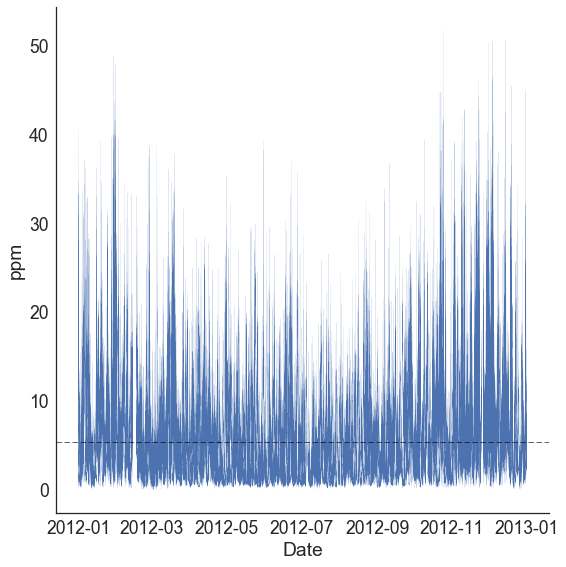

In [76]:
ax = sns.FacetGrid(merged_no2, size=8)
ax.map(plt.plot,"datetime", "amt", linewidth=0.08)
ax.map(plt.axhline, y=no2_mean, linewidth=0.6, color="black", linestyle="--")
ax.set_axis_labels("Date", "ppm")
ax.savefig("no2_ts.png", dpi=400);

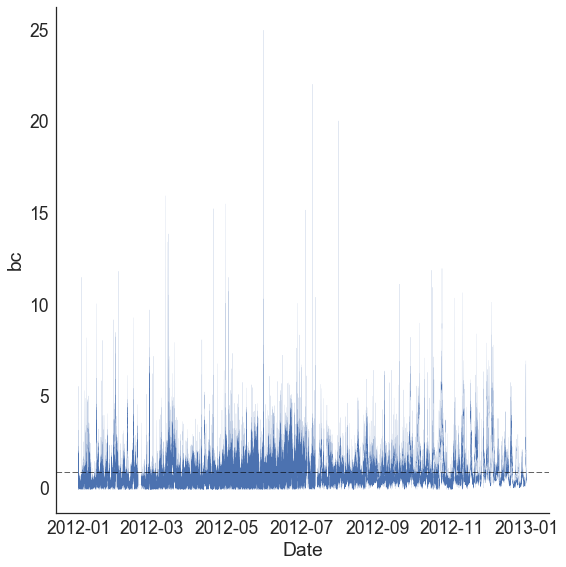

In [77]:
ax = sns.FacetGrid(merged_bc, size=8)
ax.map(plt.plot,"datetime", "amt", linewidth=0.08,)
ax.map(plt.axhline, y=bc_mean, linewidth=0.6, color="black", linestyle="--")
ax.set_axis_labels("Date", "bc")
ax.savefig("bc_ts.png", dpi=400)

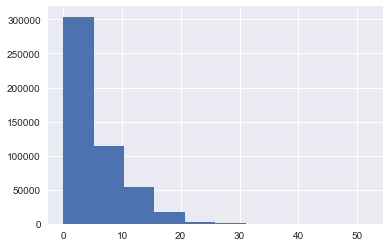

In [26]:
merged.query("pol == 'no2'").amt.hist()

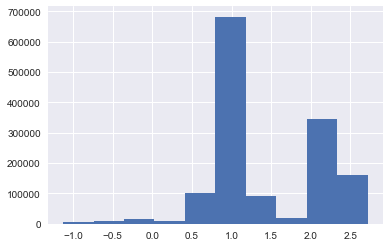

In [208]:
# Histogram of non-infinite correction factors between 1st and 99th percentile
merged["cf"][merged["cf"]!= np.inf][merged["cf"] < merged["cf"].quantile(.99)][merged["cf"] > merged["cf"].quantile(.01)].hist()

In [195]:
merged[merged["Avg1Min"] == 0]

,datetime,pol,amt,datetime5min,Avg,N,Avg1Min,cf,amt_c
167600,2012-05-04 01:00:00,no,-0.0675,2012-05-04 01:00:00,0.094043,5.0,0.0,inf,0.094043
167601,2012-05-04 01:01:00,no,-0.0475,2012-05-04 01:00:00,0.094043,5.0,0.0,inf,0.094043
167602,2012-05-04 01:02:00,no,-0.0475,2012-05-04 01:00:00,0.094043,5.0,0.0,inf,0.094043
167603,2012-05-04 01:03:00,no,-0.0725,2012-05-04 01:00:00,0.094043,5.0,0.0,inf,0.094043
167604,2012-05-04 01:04:00,no,0.2350,2012-05-04 01:00:00,0.094043,5.0,0.0,inf,0.094043
225780,2012-06-14 19:00:00,no,0.0000,2012-06-14 19:00:00,0.052926,5.0,0.0,inf,0.052926
225781,2012-06-14 19:01:00,no,0.0000,2012-06-14 19:00:00,0.052926,5.0,0.0,inf,0.052926
225782,2012-06-14 19:02:00,no,-0.0015,2012-06-14 19:00:00,0.052926,5.0,0.0,inf,0.052926
225783,2012-06-14 19:03:00,no,-0.0070,2012-06-14 19:00:00,0.052926,5.0,0.0,inf,0.052926
225784,2012-06-14 19:04:00,no,0.0085,2012-06-14 19:00:00,0.052926,5.0,0.0,inf,0.052926


In [382]:
merged["season"] = merged['datetime'].dt.month.map(season_map)
merged["day_night"] = merged['datetime'].dt.hour.map(day_night_map)
merged["weekday"] = merged['datetime'].dt.day.map(weekday_map)
merged["prob"] = merged["season"].map(season_p)*merged["day_night"].map(day_night_p)*merged["weekday"].map(weekday_p)
# merged.loc[merged['datetime'].dt.month in winter, "season"] = 4
# merged["season"] = np.where(merged['datetime'].month(), 'yes', 'no')

In [466]:
merged[4000:8010]

,datetime,pol,amt,datetime5min,Avg,N,Avg1Min,cf,amt_c,season,day_night,weekday,prob
4000,2012-01-03 20:25:00,no,0.364000,2012-01-03 20:25:00,0.256187,5.0,0.266862,0.959996,0.349439,4,2,1.0,0.088798
4001,2012-01-03 20:26:00,no,0.266667,2012-01-03 20:25:00,0.256187,5.0,0.266862,0.959996,0.255999,4,2,1.0,0.088798
4002,2012-01-03 20:27:00,no,0.189310,2012-01-03 20:25:00,0.256187,5.0,0.266862,0.959996,0.181737,4,2,1.0,0.088798
4003,2012-01-03 20:28:00,no,0.192000,2012-01-03 20:25:00,0.256187,5.0,0.266862,0.959996,0.184319,4,2,1.0,0.088798
4004,2012-01-03 20:29:00,no,0.322333,2012-01-03 20:25:00,0.256187,5.0,0.266862,0.959996,0.309439,4,2,1.0,0.088798
4005,2012-01-03 20:30:00,no,0.748621,2012-01-03 20:30:00,1.070199,5.0,1.120164,0.955395,0.715228,4,2,1.0,0.088798
4006,2012-01-03 20:31:00,no,1.176000,2012-01-03 20:30:00,1.070199,5.0,1.120164,0.955395,1.123544,4,2,1.0,0.088798
4007,2012-01-03 20:32:00,no,1.019167,2012-01-03 20:30:00,1.070199,5.0,1.120164,0.955395,0.973707,4,2,1.0,0.088798
4008,2012-01-03 20:33:00,no,1.301034,2012-01-03 20:30:00,1.070199,5.0,1.120164,0.955395,1.243001,4,2,1.0,0.088798
4009,2012-01-03 20:34:00,no,1.356000,2012-01-03 20:30:00,1.070199,5.0,1.120164,0.955395,1.295515,4,2,1.0,0.088798


In [ ]:
# Run simulations
visits = [x+1 for x in range(600)]
lengths = [1, 2, 3, 5, 10, 15, 30]
# visits = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 500]
# lengths = [x+1 for x in range(15)]
n = 20000
results = {}
for p in ["no2", "bc"]:
    results[p] = []
    pol = merged[merged["pol"] == p]
    data = [[ts.to_pydatetime() for ts in pol["datetime"].tolist()],pol["amt"].tolist()]
    data_c = [[ts.to_pydatetime() for ts in pol["datetime"].tolist()],pol["amt_c"].tolist()]
    for d in [data, data_c]:
        simulationResults = 0
        for i in range(n):
            simulationResults = np.add(simulationResults,rand(d, visits, lengths)) 
        simulationRMSE = np.sqrt(np.divide(simulationResults,n))
        results[p].append(simulationRMSE)

In [ ]:
# Run stratified simulations
visits = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 500]
lengths = [x+1 for x in range(15)]
n = 20000
results_stratified = {}
for season in [x+1 for x in range(4)]:
    for day_night in [x+1 for x in range(2)]:
        for weekday in [x+1 for x in range(2)]:
            subset = merged[merged["season"] == season and merged["day_night"] == day_night and merged["weekday"] == weekday]
            for p in ["no", "no2", "bc"]:
                results[p] = []
                pol = subset[subset["pol"] == p]
                data = [[ts.to_pydatetime() for ts in pol["datetime"].tolist()],pol["amt"].tolist()]
                data_c = [[ts.to_pydatetime() for ts in pol["datetime"].tolist()],pol["amt_c"].tolist()]
                for d in [data, data_c]:
                    simulationResults = 0
                    for i in range(n):
                        simulationResults = np.add(simulationResults,rand(d, visits, lengths)) 
                    simulationRMSE = np.sqrt(np.divide(simulationResults,n))
                    results_stratified[p].append(simulationRMSE)            

In [296]:
results_pct = {}
for p in ["no", "no2", "bc"]:
    results_pct[p] = results[p][0]

In [297]:
results_pct["no"] = results_pct["no"]*(no_mean**-1)
results_pct["no2"] = results_pct["no2"]*(no2_mean**-1)
results_pct["bc"] = results_pct["bc"]*(bc_mean**-1)

In [39]:
bc_mean = np.mean([[ts.to_pydatetime() for ts in merged[merged["pol"] == "bc"]["datetime"].tolist()],merged[merged["pol"] == "bc"]["amt"].tolist()][1])
no_mean = np.mean([[ts.to_pydatetime() for ts in merged[merged["pol"] == "no"]["datetime"].tolist()],merged[merged["pol"] == "no"]["amt"].tolist()][1])
no2_mean = np.mean([[ts.to_pydatetime() for ts in merged[merged["pol"] == "no2"]["datetime"].tolist()],merged[merged["pol"] == "no2"]["amt"].tolist()][1])

bc_std = np.std([[ts.to_pydatetime() for ts in merged[merged["pol"] == "bc"]["datetime"].tolist()],merged[merged["pol"] == "bc"]["amt"].tolist()][1])
no_std = np.std([[ts.to_pydatetime() for ts in merged[merged["pol"] == "no"]["datetime"].tolist()],merged[merged["pol"] == "no"]["amt"].tolist()][1])
no2_std = np.std([[ts.to_pydatetime() for ts in merged[merged["pol"] == "no2"]["datetime"].tolist()],merged[merged["pol"] == "no2"]["amt"].tolist()][1])

In [40]:
((bc_mean, bc_std), (no_mean, no_std), (no2_mean, no2_std))

((0.88304232255721671, 0.83638352735338062),
 (9.5803754641798609, 30.508419914380305),
 (5.3844408101777024, 4.7065210412029286))

In [314]:
X = [x+1 for x in range(15)]
Y = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 500]
X, Y = np.meshgrid(X, Y)
Z = results_pct["bc"]

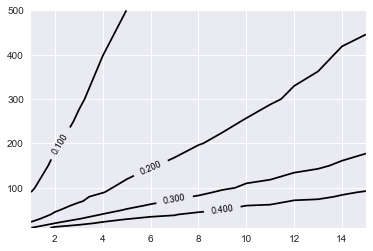

In [342]:
levels = np.linspace(0.1, 0.4, 4)

ax = plt.contour(X, Y, Z, levels=levels, colors='k')
plt.clabel(ax, fontsize=9, inline=1)


plt.show()

In [30]:
data1min["datetime"] = pd.to_datetime(data1min["Date/Time[LST]"], format='%m/%d/%Y %H:%M')
data5min["datetime"] = pd.to_datetime(data5min["Date/Time[LST]"], format='%m/%d/%y %H:%M')
data1min["nox"] = data1min["NO [ppb]"] + data1min["NO2 [ppb]"]
no = data1min[["datetime", "NO [ppb]"]]
no2 = data1min[["datetime", "NO2 [ppb]"]]
bc = data1min[["datetime", "BC [ug/m3]"]]
nox = data1min[["datetime", "NO [ppb]", "NO2 [ppb]"]]
# data1min = data1min.copy().rename(columns={"NO [ppb]": "no", "NO2 [ppb]": "no2", "BC [ug/m3]": "bc"})
# data["bc"] = data["pm"].replace("<", "0")

In [27]:
bc = bc.loc[bc["BC [ug/m3]"] != "Null"]

In [28]:
bc["BC [ug/m3]"] = bc["BC [ug/m3]"].astype(float)

In [29]:
bc["BC [ug/m3]"] = np.where(bc["BC [ug/m3]"] < 0, 0, bc["BC [ug/m3]"])

In [76]:
dates = bc["datetime"].tolist()
ugm3 = bc["BC [ug/m3]"].tolist()

In [211]:
bc = [(a, b) for a in dates for b in ugm3]

NameError: name 'ugm3' is not defined

In [36]:
bc_list = [[ts.to_pydatetime() for ts in bc["datetime"].tolist()],bc["BC [ug/m3]"].tolist()]
bc_tuple = [tuple(x) for x in bc.values]

In [63]:
max(test)== min(test) + timedelta(minutes=len(test)-1)

True

In [62]:
test = [datetime(2012, 1, 1, 0, 1), datetime(2012, 1, 1, 0, 2), datetime(2012, 1, 1, 0, 3), datetime(2012, 1, 1, 0, 4)]

In [44]:
data["Flags[CO]"].unique()

array(['Null', 'A/v0/v1'], dtype=object)

In [2]:
data =  pd.read_csv("PMdata.csv")

data["pm"] = data["pm"].replace("<", "0")
data["pm"] = data["pm"].replace(" ", "0")
# data = data[data.pm.notnull()]
data["pm"] = data["pm"].astype(float)

data["datetime"] = pd.to_datetime(data.datetime, format='%m/%d/%y %H:%M')

data.set_index('datetime', inplace=True)

data = data.ix["2014"]
data = data[~pd.isnull(data).any(axis=1)]

pm = data.pm.tolist()

In [38]:
data.reset_index(inplace=True)

In [98]:
pm = data.pm.tolist()

In [80]:
pm[8759]

5.4

In [70]:
random.randint(0,len(pm))

2576

In [75]:
pm.pop(2576)

3.2

In [189]:
np.mean(pm)

6.2765828571428566

In [305]:
len(pm)

8750

In [317]:
[x+1 for x in range(15)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [87]:
# New Rand
def rand(data, visits, lengths):
    mean = np.mean(data[1])
    results = []
    for v in visits:
        length_results = []
        for l in lengths:
            rchosen = []
            vloop = v
            s = []
            while vloop > 0:
                r = random.randint(0,len(data[1])-1)
                if len(data[1]) < r + l:
                        r = l - len(data[1])
                # Ensure that only consecutive observations are chosen for each group of consecutive visits
                while (max(data[0][r:r+l]) != min(data[0][r:r+l]) + timedelta(minutes=len(data[0][r:r+l])-1)) or (r in rchosen or (r + l) in rchosen):
                    r = random.randint(0,len(data[1])-1)
                    if len(data[1]) < r + l:
                        r = l - len(data[1])
                for i in range(l):
                    s.append(data[1][r])
                vloop -= l
            length_results.append((np.mean(s) - mean)**2)
        results.append(length_results)
    return results

In [ ]:
# Stratified Random Sampling

summer = [4, 5, 6, 7, 8, 9]
winter = [1, 2, 3, 10, 11, 12]

weekend

def strat_rand(data, visits, lengths):
    mean = np.mean(data[1])
    results = []
    for v in visits:
        length_results = []
        for l in lengths:
            rchosen = []
            vloop = v
            s = []
            while vloop > 0:
                r = random.randint(0,len(data[1])-1)
                if len(data[1]) < r + l:
                        r = l - len(data[1])
                # Ensure that only consecutive observations are chosen for each group of consecutive visits
                while (max(data[0][r:r+l]) != min(data[0][r:r+l]) + timedelta(minutes=len(data[0][r:r+l])-1)) or (r in rchosen or (r + l) in rchosen):
                    r = random.randint(0,len(data[1])-1)
                    if len(data[1]) < r + l:
                        r = l - len(data[1])
                for i in range(l):
                    s.append(data[1][r])
                vloop -= l
            length_results.append((np.mean(s) - mean)**2)
        results.append(length_results)
    return results

In [79]:
# # Original Rand
# def rand(data, visits, lengths):
#     mean = np.mean(data[1])
#     results = []
#     for v in visits:
#         length_results = []
#         for l in lengths:
#             times = data[0].copy()
#             obs = data[1].copy()
#             vloop = v
#             s = []
#             while vloop > 0:
#                 r = random.randint(0,len(obs)-1)
#                 if len(obs) < r + l:
#                         r = l - len(obs)
#                 # Ensure that only consecutive observations are chosen for each group of consecutive visits
#                 while max(times[r:r+l]) != min(times[r:r+l]) + timedelta(minutes=len(times[r:r+l])-1):
#                     r = random.randint(0,len(obs)-1)
#                     if len(obs) < r + l:
#                         r = l - len(obs)
#                 for i in range(l):
#                     s.append(obs.pop(r))
#                 vloop -= l
# #             length_results.append(abs(np.mean(s) - mean))
#             length_results.append((np.mean(s) - mean)**2)
#         results.append(length_results)
#     return results

In [99]:
visits = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 500]
lengths = [x+1 for x in range(15)]
simulationResults = 0
n = 20000
for i in range(n):
    simulationResults = np.add(simulationResults,rand(bc_list, visits, lengths)) 
simulationRMSE = np.sqrt(np.divide(simulationResults,n))

In [79]:
# Run1:
# visits = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 500]
# lengths = [x+1 for x in range(15)]

# Run2:
# visits = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 500]
# lengths = [x+1 for x in range(15)]

# simulationResults = 0
# n = 100a0
# for i in range(n):
#     simulationResults = np.add(simulationResults,rand(pm, visits, lengths)) 
# simulationRMSE = np.sqrt(np.divide(simulationResults,n))

In [271]:
with open('Jun3Random', 'wb') as fp:
    pickle.dump(results, fp)
# with open ('outfile', 'rb') as fp:
#     itemlist = pickle.load(fp)

In [429]:
cmap = LinearSegmentedColormap.from_list('custom', 
                                             [(0,    '#5e4fa2'),
                                              (0.1,'#3288bd'),
                                              (0.2,'#66c2a5'),
                                              (0.3,'#abdda4'),
                                              (0.4,'#e6f598'),
                                              (0.5,'#fee08b'),
                                              (0.6,'#fdae61'),
                                              (0.7,'#f46d43'),
                                              (0.8,'#d53e4f'),
                                              (1,'#9e0142')], N=10)

In [414]:
colors = [((204, 229, 255),0.1), ((0, 76, 153),0.1)]  # R -> G -> B
n_bins = 10  # Discretizes the interpolation into bins
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bins)

ValueError: Invalid RGBA argument: 0.1

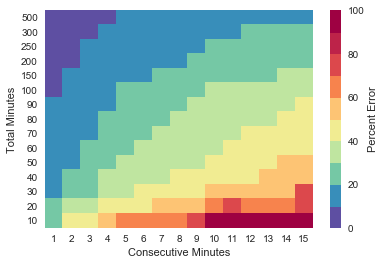

In [465]:
# ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(results_pct["bc"]*100, vmin=0, vmax=100, cmap=cmap, cbar_kws={'label': 'Percent Error'})
ax.invert_yaxis()
ax.set_xticklabels(lengths)
ax.set_yticklabels(list(reversed(visits)))
ax.set_xlabel('Consecutive Minutes')
ax.set_ylabel('Total Minutes')
for item in ax.get_yticklabels():
    item.set_rotation(0)
ax.get_figure().savefig("bc.png", dpi=400)

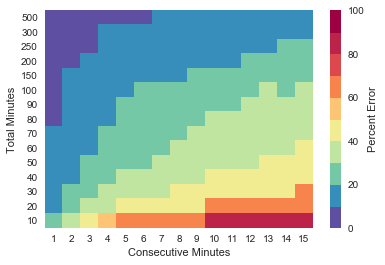

In [464]:
# ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(results_pct["no2"]*100, vmin=0, vmax=100, cmap=cmap, cbar_kws={'label': 'Percent Error'})
ax.invert_yaxis()
ax.set_xticklabels(lengths)
ax.set_yticklabels(list(reversed(visits)))
ax.set_xlabel('Consecutive Minutes')
ax.set_ylabel('Total Minutes')
for item in ax.get_yticklabels():
    item.set_rotation(0)
ax.get_figure().savefig("no2.png", dpi=400)

In [454]:
results_pct["bc"]*100

array([[  29.87665941,   42.50138609,   47.90385097,   55.04506517,
          68.58359204,   67.85870028,   68.3947337 ,   68.01124336,
          70.25316788,   95.13961485,   96.26481758,   99.53419644,
          98.17032789,   99.1749212 ,  100.4674221 ],
       [  21.29609642,   30.22239347,   36.02991073,   42.92035627,
          47.84565145,   48.13037415,   55.8652271 ,   55.92253135,
          56.18376163,   69.32854372,   70.05685344,   68.88709871,
          69.38548017,   69.7297776 ,   70.2956375 ],
       [  17.38730333,   24.51754996,   29.90416377,   33.73821191,
          39.6518725 ,   42.97885027,   42.4260839 ,   48.88168405,
          48.64048349,   56.5518866 ,   55.30733071,   57.12686393,
          57.44803093,   59.12174465,   70.19221671],
       [  14.9932035 ,   21.10297251,   25.44867415,   30.43878646,
          33.83980248,   36.76993156,   39.46080478,   43.16218221,
          43.76526852,   48.89262883,   48.86659181,   49.54571482,
          50.02622061,

In [251]:
test[0].get_figure().savefig("output.png", dpi=400)

In [71]:
np.divide(simulationResults[0], 2)

array([[ 1.9   ,  4.3   ],
       [ 3.0594,  3.3375]])

In [70]:
simulationResults[0]

[[3.7999999999999998, 8.6000000000000014],
 [6.1188000000000002, 6.6749999999999998]]

In [66]:
simulationResults[1]

[[6.2000000000000002, 1.8999999999999999],
 [6.3973999999999993, 6.8287999999999993]]

[<matplotlib.text.Text at 0x115011400>, <matplotlib.text.Text at 0x114ffc6d8>]

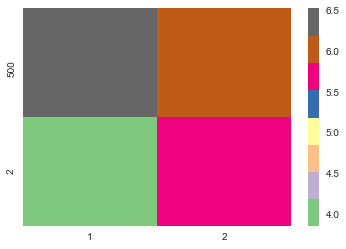

In [58]:
randTest = rand(pm, [2, 500], [1, 2])
# randTest = rand(pm, [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 500], [x+1 for x in range(15)])

# randTest, s = rand(pm, [1], [1000])
# df = pd.DataFrame(s)
# df.hist()

# sns.color_palette("Paired", as_cmap=True)
# cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
# sns.choose_diverging_palette()
# cmap = sns.color_palette(240, 10, n=9, cmap=True)
ax = sns.heatmap(randTest, cmap="Accent")
ax.invert_yaxis()
ax.set_xticklabels([1, 2])
ax.set_yticklabels([500, 2])

In [59]:
randTest

[[3.8499999999999996, 5.8499999999999996],
 [6.5226000000000006, 6.0839999999999996]]

In [ ]:
data.drop([0])

In [50]:
list(reversed([2, 500]))

[500, 2]

In [161]:
annualAvg = np.mean(data.pm)

In [162]:
annualAvg

6.276582857142844

In [9]:
len(data.pm)

8760

In [245]:
sampleAvg = np.mean(data.take(np.random.permutation(len(data))[:1000]).pm)

In [246]:
sampleAvg

6.113299999999991

In [15]:
sampleAvg = np.mean(data.take(np.random.permutation(len(data))[:5]).pm)
sampleAvgs = []
for i in range(1000):
    sampleAvgs.append(np.mean(data.take(np.random.permutation(len(data))[:5]).pm))

In [13]:
data.take(np.random.permutation(len(data))[:5]).pm

datetime
2014-10-27 09:00:00    10.5
2014-01-25 17:00:00     5.2
2014-12-19 13:00:00     1.7
2014-07-24 12:00:00     3.3
2014-03-27 07:00:00     1.5
Name: pm, dtype: float64

In [14]:
data.sample(n=5).pm

datetime
2014-01-01 06:00:00     8.2
2014-02-08 04:00:00     3.2
2014-07-29 08:00:00     4.2
2014-08-23 08:00:00    10.9
2014-04-18 16:00:00     3.1
Name: pm, dtype: float64

In [16]:
sampleAvgs2 = []
for i in range(1000):
    sampleAvgs2.append(np.mean(data.sample(n=5).pm))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10db51470>]], dtype=object)

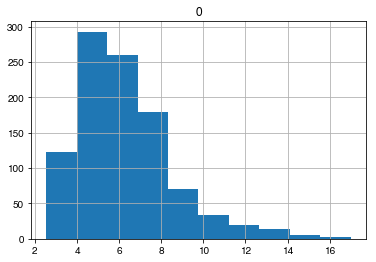

In [17]:
df2 = pd.DataFrame(sampleAvgs2)
df2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d2e6128>]], dtype=object)

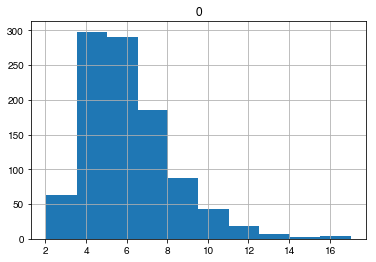

In [18]:
df = pd.DataFrame(sampleAvgs)
df.hist()

In [3]:
uniform_data = np.random.rand(10, 12)

In [4]:
uniform_data

array([[ 0.97802044,  0.50138008,  0.12037897,  0.02188043,  0.85461811,
         0.8217014 ,  0.13127829,  0.16098051,  0.38067068,  0.69237515,
         0.81130553,  0.73751703],
       [ 0.82066353,  0.1616369 ,  0.0882263 ,  0.52551445,  0.76683675,
         0.78055372,  0.3109151 ,  0.90991658,  0.74870347,  0.70478773,
         0.00833904,  0.23969491],
       [ 0.92101222,  0.12298682,  0.41809457,  0.78242087,  0.77436766,
         0.46443669,  0.16543257,  0.3019539 ,  0.49202781,  0.03155179,
         0.18614536,  0.90085184],
       [ 0.50421279,  0.78808387,  0.30945059,  0.66593542,  0.26140491,
         0.64641729,  0.93061068,  0.18703038,  0.77889126,  0.38466413,
         0.53435187,  0.39894999],
       [ 0.53275317,  0.52586636,  0.72418005,  0.02611774,  0.55613439,
         0.47662244,  0.33559134,  0.0167529 ,  0.26449919,  0.44152902,
         0.93267666,  0.70699767],
       [ 0.90854977,  0.26089401,  0.74878386,  0.72763483,  0.66120846,
         0.30294625,  